In [79]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [80]:
#Import the 800MB file from AWS s3 bucket
data = pd.read_csv('crime_temp_hardship_merged_df.csv')

C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
data.head(2)

,Unnamed: 0,date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,...,Precipation Avg (in),Precipation Min (in),COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,0,2019-05-12,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,323.0,6.0,...,0.05,-,Greater Grand Crossing,3.6,29.6,23.0,16.5,41.0,17285.0,66.0
1,1,2019-05-12,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,GAS STATION,True,False,624.0,8.0,...,0.05,-,Greater Grand Crossing,3.6,29.6,23.0,16.5,41.0,17285.0,66.0


In [82]:
list(data)

['Unnamed: 0',
 'date',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'Ward',
 'Community Area Number',
 'Year',
 'Latitude',
 'Longitude',
 'Location',
 'Zip Codes',
 'Community Areas',
 'Boundaries - ZIP Codes',
 'Police Districts',
 'Police Beats',
 'time',
 'Temp Max (° F)',
 'Temp Avg (° F)',
 'Temp Min (° F)',
 'Dew Max (° F)',
 'Dew Avg (° F)',
 'Dew Min (° F)',
 'Humidity Max (%)',
 'Humidity Avg (%)',
 'Humidity Min (%)',
 'Wind Max (mph)',
 'Wind Avg (mph)',
 'Wind Min (mph)',
 'Pressure Max (Hg)',
 'Pressure Avg (Hg)',
 'Pressue Min (Hg)',
 'Precipation Max (in)',
 'Precipation Avg (in)',
 'Precipation Min (in)',
 'COMMUNITY AREA NAME',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

In [83]:
Timeseries_data = data[['date', 'Primary Type','Temp Avg (° F)','PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY',\
                       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PER CAPITA INCOME ','HARDSHIP INDEX']].copy()
Timeseries_data

,date,Primary Type,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,WEAPONS VIOLATION,47.0,3.6,29.6,16.5,17285.0,66.0
1,2019-05-12,WEAPONS VIOLATION,47.0,3.6,29.6,16.5,17285.0,66.0
2,2019-05-12,BATTERY,47.0,3.6,29.6,16.5,17285.0,66.0
3,2019-05-12,DECEPTIVE PRACTICE,47.0,3.6,29.6,16.5,17285.0,66.0
4,2019-05-12,ASSAULT,47.0,3.6,29.6,16.5,17285.0,66.0
5,2019-05-12,OTHER OFFENSE,47.0,3.6,29.6,16.5,17285.0,66.0
6,2019-05-12,BATTERY,47.0,3.6,29.6,16.5,17285.0,66.0
7,2019-05-12,OTHER OFFENSE,47.0,3.6,29.6,16.5,17285.0,66.0
8,2019-05-12,CRIMINAL DAMAGE,47.0,3.6,29.6,16.5,17285.0,66.0
9,2019-05-12,NARCOTICS,47.0,3.6,29.6,16.5,17285.0,66.0


In [84]:
#Groupby Date and get count of crimes for each date
groupby = Timeseries_data.groupby(['date']).count()
groupby.head(2)

,Primary Type,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX
date,,,,,,,
2010-01-01,1351,1351,1351,1351,1351,1351,1351
2010-01-02,790,790,790,790,790,790,790


In [85]:
#pull out only the crimes to join back in as a total column
totalCrimes = groupby[['Primary Type']]
totalCrimes

,Primary Type
date,
2010-01-01,1351
2010-01-02,790
2010-01-03,755
2010-01-04,852
2010-01-05,907
2010-01-06,884
2010-01-07,861
2010-01-08,930
2010-01-09,814


In [88]:
Timeseries_data.head(10)

,date,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
1,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
2,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
3,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
4,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
5,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
6,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
7,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
8,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
9,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0


In [90]:
#drop Primary type'
#Timeseries_data.drop(['Primary Type'], axis=1, inplace=True)

In [92]:
#Timeseries_data.drop_duplicates(keep='first')
Timeseries_data.dropna(how='any', inplace=True)

In [93]:
Timeseries_data

,date,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
1,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
2,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
3,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
4,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
5,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
6,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
7,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
8,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
9,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0


In [94]:
#drop duplicate rows for dates, keeping only 1 row
Timeseries_data.drop_duplicates(keep='first', inplace=True)


In [96]:
#check if there are any nulls???
#Timeseries_data.isnull().sum()
Timeseries_data

,date,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0
11,2019-05-11,49.0,3.6,29.6,16.5,17285.0,66.0
28,2019-05-10,51.0,3.6,29.6,16.5,17285.0,66.0
49,2019-05-09,57.0,3.6,29.6,16.5,17285.0,66.0
63,2019-05-08,57.0,3.6,29.6,16.5,17285.0,66.0
82,2019-05-07,47.0,3.6,29.6,16.5,17285.0,66.0
101,2019-05-06,58.0,3.6,29.6,16.5,17285.0,66.0
126,2019-05-05,60.0,3.6,29.6,16.5,17285.0,66.0
146,2019-05-04,51.0,3.6,29.6,16.5,17285.0,66.0
164,2019-05-03,48.0,3.6,29.6,16.5,17285.0,66.0


In [102]:
#join the totalCrimes column with Timeseriesdata
FinalFrame = Timeseries_data.merge(totalCrimes, how = 'left', on = ['date'])


In [103]:
FinalFrame.head(10)

,date,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX,Primary Type
0,2019-05-12,47.0,3.6,29.6,16.5,17285.0,66.0,619
1,2019-05-11,49.0,3.6,29.6,16.5,17285.0,66.0,676
2,2019-05-10,51.0,3.6,29.6,16.5,17285.0,66.0,766
3,2019-05-09,57.0,3.6,29.6,16.5,17285.0,66.0,715
4,2019-05-08,57.0,3.6,29.6,16.5,17285.0,66.0,745
5,2019-05-07,47.0,3.6,29.6,16.5,17285.0,66.0,675
6,2019-05-06,58.0,3.6,29.6,16.5,17285.0,66.0,768
7,2019-05-05,60.0,3.6,29.6,16.5,17285.0,66.0,755
8,2019-05-04,51.0,3.6,29.6,16.5,17285.0,66.0,687
9,2019-05-03,48.0,3.6,29.6,16.5,17285.0,66.0,765


In [108]:
################################### MODEL 1 TIME SERIES FORECAST################
#Predicting Total Crime Count by temperature ONLY
FinalFrame.dropna(how='any', inplace=True)
FinalFrame.rename(columns={'Primary Type':'Crime Count'}, inplace=True)
FinalFrame.describe()

,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX,Crime Count
count,253421.000000,253421.000000,253421.000000,253421.000000,253421.000000,253421.000000,253421.000000
mean,50.811898,4.980134,21.962708,20.528872,25479.418833,49.851682,810.606118
std,20.301178,3.675707,11.305902,11.779903,15302.772206,28.411357,149.208621
min,-16.000000,0.300000,3.300000,2.500000,8201.000000,1.000000,314.000000
25%,35.000000,2.300000,13.200000,11.800000,15754.000000,25.000000,703.000000
50%,51.000000,3.800000,19.200000,18.500000,21323.000000,50.000000,786.000000
75%,69.000000,6.900000,29.200000,27.500000,28887.000000,74.000000,909.000000
max,93.000000,15.800000,56.500000,54.800000,88669.000000,98.000000,1466.000000


In [132]:
X=FinalFrame[['Temp Avg (° F)','PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY'\
             ,'PER CAPITA INCOME ','HARDSHIP INDEX']]
y = FinalFrame['Crime Count'].values.reshape(-1,1)
print(X.shape, y.shape)

(253421, 5) (253421, 1)


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [134]:
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)

########SCORES######
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')



Training Score: 0.24143433388994018
Testing Score: 0.24069392925008115


Text(0.5, 1.0, 'Residual Plot')

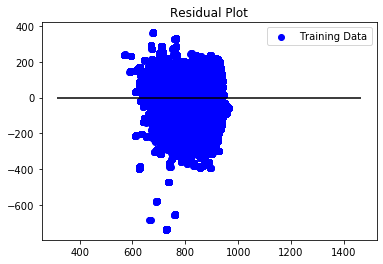

In [135]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
#plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

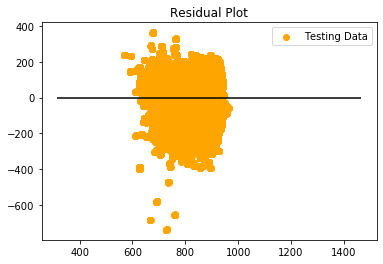

In [136]:
# Plot the Residuals for the Training and Testing data
#plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")